Influencer: 1800, SpreadRank Score: 0.08550593561900462
Influencer: 2425, SpreadRank Score: 0.05148709606190398
Influencer: 646, SpreadRank Score: 0.05138458728328882
Influencer: 1725, SpreadRank Score: 0.0411514119369796
Influencer: 598, SpreadRank Score: 0.037957166986409295
Influencer: 568, SpreadRank Score: 0.034522971796070404
Influencer: 912, SpreadRank Score: 0.03401421756595485
Influencer: 1916, SpreadRank Score: 0.031787825999303645
Influencer: 1276, SpreadRank Score: 0.03146969352241311
Influencer: 907, SpreadRank Score: 0.030027956911544047


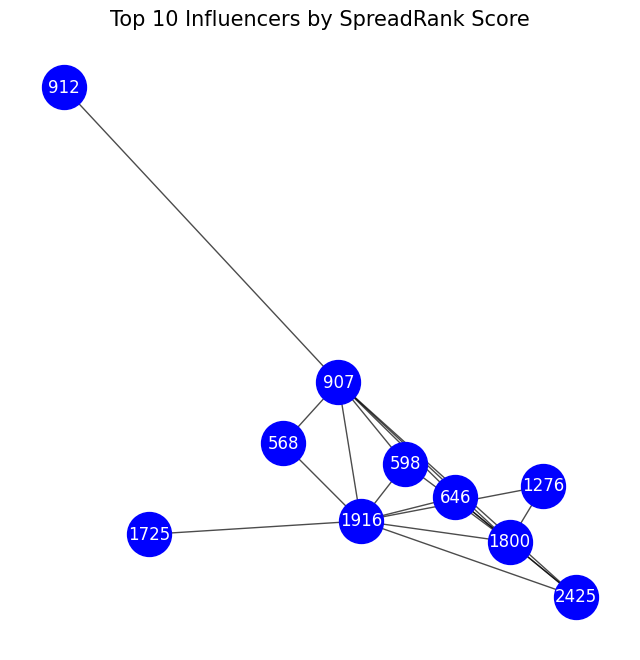

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load your datasets
# Assuming edges_df has columns: 'source', 'target'
# Assuming target_df h as columns: 'id', 'views', 'partner', etc.

edges_df = pd.read_csv("/content/sample_data/musae_RU_edges.csv")  # Update the path to your actual dataset
target_df = pd.read_csv("/content/sample_data/musae_RU_target.csv")  # Update the path to your actual dataset

# Create a directed graph
G = nx.DiGraph()

# Step 1: Add edges to the graph
# The 'from' and 'to' columns represent connections (edges) between influencers (nodes)
G.add_edges_from(edges_df[['from', 'to']].values)

# Step 2: Ensure all influencers in target_df are added as nodes, even if they have no edges yet
for influencer_id in target_df['id']:
    if influencer_id not in G:
        G.add_node(influencer_id)

# Step 3: Add attributes from the target dataset to the graph nodes
for idx, row in target_df.iterrows():
    influencer_id = row['id']
    # Add the attributes of each influencer to the corresponding node in the graph
    G.nodes[influencer_id].update(row.to_dict())

# Step 4: Calculate Degree Centrality (local influence)
degree_centrality = nx.degree_centrality(G)

# Step 5: Calculate PageRank (global influence)
pagerank = nx.pagerank(G)

# Step 6: Calculate SpreadRank Scores by combining degree centrality and pagerank with additional spread metrics
spreadrank_scores = {}

# You can adjust the weights here if needed (e.g., 0.5 for both)
for node in G.nodes():
    local_influence = degree_centrality.get(node, 0)
    global_influence = pagerank.get(node, 0)

    # SpreadRank is calculated by considering both local and global influence
    spreadrank_scores[node] = 0.6 * local_influence + 0.4 * global_influence  # Adjust the weights as needed

# Step 7: Sort the influencers by their spreadrank score in descending order
sorted_influencers = sorted(spreadrank_scores.items(), key=lambda x: x[1], reverse=True)

# Step 8: Display the top influencers (for example, top 10)
top_10_influencers = sorted_influencers[:10]
for influencer, score in top_10_influencers:
    print(f'Influencer: {influencer}, SpreadRank Score: {score}')

# Step 9: Create a subgraph for the top influencers
top_10_nodes = [node for node, score in top_10_influencers]

# Step 10: Create a subgraph containing only the top 10 nodes
G_top_10 = G.subgraph(top_10_nodes)

# Step 11: Draw the subgraph
plt.figure(figsize=(8, 8))  # Set the figure size

# Position the nodes using a layout
pos = nx.spring_layout(G_top_10, seed=42)  # Using spring layout for the subgraph
nx.draw_networkx_nodes(G_top_10, pos, node_size=1000, node_color='blue')  # Highlight nodes in blue
nx.draw_networkx_edges(G_top_10, pos, alpha=0.7)  # Draw edges with some transparency

# Step 12: Add labels for the top influencers
nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_color='white')

# Step 13: Show the plot
plt.title("Top 10 Influencers by SpreadRank Score", fontsize=15)
plt.axis('off')  # Turn off the axis
plt.show()